### Import Dependencies

In [1]:
import cv2
import csv 
import os
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score # Accuracy metrics 
import pickle
from sklearn.linear_model import LogisticRegression
from imblearn.combine import SMOTETomek

### Loading and Balancing the Dataset

In [2]:
df = pd.read_csv('emotic.csv')

In [3]:
X = df.drop('class', axis=1)
y = df['class'] # target value

### Training the ML Models

In [4]:
smt = SMOTETomek(random_state=42)
X, y = smt.fit_resample(X, y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234)

In [6]:
pipelines = {
    'lr': make_pipeline(StandardScaler(), LogisticRegression(multi_class='multinomial')),
    'randomForest':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'svc':make_pipeline(SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo')),
}

In [7]:
# fitting the model on the dataset after implementing SMOTETomek technique 
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train.values, y_train)
    fit_models[algo] = model

C:\Users\norra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test.values)
    print(algo, accuracy_score(y_test, yhat))

lr 0.7194206008583691
randomForest 0.9329399141630901
svc 0.944206008583691


### Model Evaluation Using Confusion Matrix

               precision    recall  f1-score   support

    Annoyance       0.99      0.91      0.94       309
     Aversion       1.00      0.98      0.99       306
Disconnection       0.96      0.92      0.94       284
   Engagement       0.79      0.95      0.87       330
   Excitement       0.98      0.94      0.96       316
     Pleasure       0.99      0.96      0.98       319

     accuracy                           0.94      1864
    macro avg       0.95      0.94      0.95      1864
 weighted avg       0.95      0.94      0.95      1864



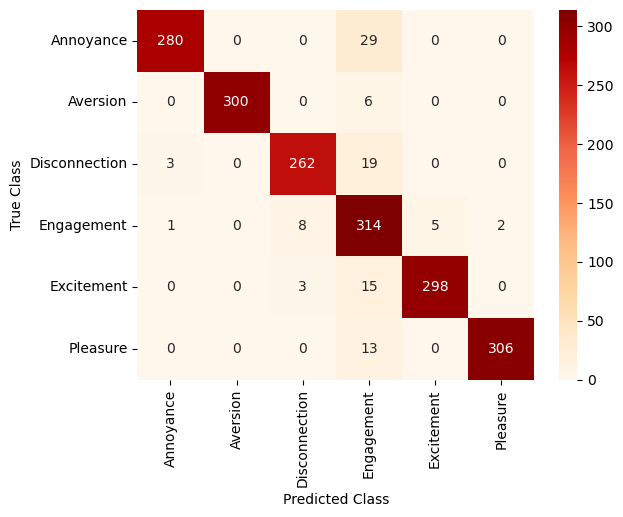

Wall time: 53.5 s


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.multiclass import unique_labels
y_true = y_test

y_pred = model.predict(X_test.values)

confusion_matrix = confusion_matrix(y_true, y_pred)

sns.heatmap(confusion_matrix, annot=True, fmt='d',
            xticklabels=unique_labels(y_test), yticklabels=unique_labels(y_test), cmap='OrRd')

plt.xlabel('Predicted Class')
plt.ylabel('True Class')

print(classification_report(y_true, y_pred,
      target_names=unique_labels(y_test)))

plt.show()
